
### Problem statement
<span style="color:blue">


LearnX Sales Forecasting
LearnX is an online learning platform aimed at professionals and students. LearnX serves as a market place that allows instructors to build online courses on topics of their expertise which is later published after due diligence by the LearnX team. The platform covers a wide variety of topics including Development, Business, Finance & Accounting & Software Marketing and so on

Effective forecasting for course sales gives essential insight into upcoming cash flow meaning business can more accurately plan the budget to pay instructors and other operational costs and invest in the expansion of the business.

Sales data for more than 2 years from 600 courses of LearnX's top domains is available along with information on

Competition in the market for each course
Course Type (Course/Program/Degree)
Holiday Information for each day
User Traffic on Course Page for each day
Your task is to predict the course sales for each course in the test set for the next 60 days.



####  Descriptive analysis of Variables
<span style="color:blue">

##### 1. Data Summary
##### 2. Data cleansing
##### 3. Encoding categorical attributes
##### 4. Data Correlation
##### 5. Save clean data to csv
##### 6. Scatter plots
##### 6. model building-linear regression


####  1. Data Summary

In [1]:
# Read csv file
import pandas as pd 
df = pd.read_csv("train.csv")
df.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [2]:
# Get the shape
print(df.shape)


(512087, 11)


In [3]:
df.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


train.csv file contains 512087 rows and 11 coloums(attributes). These attributes act as features. The missing entries are also there.

Next aim is to find null values and remove them.

####  Data Cleansing

In [4]:
# Finding the null values.
print(df.isnull().sum())

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64


In [5]:
# Dropping the missing values.
df = df.dropna()
df.count()

ID                    510323
Day_No                510323
Course_ID             510323
Course_Domain         510323
Course_Type           510323
Short_Promotion       510323
Public_Holiday        510323
Long_Promotion        510323
User_Traffic          510323
Competition_Metric    510323
Sales                 510323
dtype: int64

In [6]:
# After dropping the values
print(df.isnull().sum())

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
User_Traffic          0
Competition_Metric    0
Sales                 0
dtype: int64


#### Encoding Categorical attributes


In [7]:
# Encoding the categorical attributes
df['Course_Domain']=df['Course_Domain'].astype('category')
df['Course_Domain']=df.Course_Domain.cat.codes

df['Course_Type']=df['Course_Type'].astype('category')
df['Course_Type']=df.Course_Type.cat.codes


In [8]:
# get the basic statistical details like  count, mean, std etc. of a data
df.describe()


,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,510323.000000,510323.000000,510323.000000,510323.000000,510323.000000,510323.000000,510323.000000,510323.000000,510323.000000,510323.000000,510323.000000
mean,274118.734938,434.895117,300.510669,1.790441,0.970272,0.380242,0.031643,0.490658,15383.138181,0.073345,120.873837
std,158417.686716,256.048806,173.573799,0.911436,0.997828,0.485447,0.175047,0.499913,7732.516853,0.100115,54.366159
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136521.500000,214.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411506.500000,658.000000,451.000000,3.000000,2.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,3.000000,2.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


#### Correlation

In [9]:
# Find the correlation of variables
df.corr()


,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
ID,1.000000,0.001067,0.999996,0.030586,0.039504,-0.000004,0.001308,-0.040347,0.034415,-0.007431,0.017968
Day_No,0.001067,1.000000,-0.000489,-0.007761,0.005622,0.014644,0.019101,-0.020185,0.021620,0.003229,0.060120
Course_ID,0.999996,-0.000489,1.000000,0.030576,0.039493,-0.000026,0.001275,-0.040383,0.034323,-0.007385,0.017817
Course_Domain,0.030586,-0.007761,0.030576,1.000000,0.211680,-0.000442,0.002837,0.149011,-0.272943,0.116446,-0.030822
Course_Type,0.039504,0.005622,0.039493,0.211680,1.000000,0.000318,-0.002378,0.020316,0.037716,0.138384,0.138841
Short_Promotion,-0.000004,0.014644,-0.000026,-0.000442,0.000318,1.000000,-0.018751,-0.001148,0.198475,0.000182,0.367558
Public_Holiday,0.001308,0.019101,0.001275,0.002837,-0.002378,-0.018751,1.000000,0.008327,-0.108264,-0.000491,-0.135046
Long_Promotion,-0.040347,-0.020185,-0.040383,0.149011,0.020316,-0.001148,0.008327,1.000000,-0.205861,-0.119382,-0.110650
User_Traffic,0.034415,0.021620,0.034323,-0.272943,0.037716,0.198475,-0.108264,-0.205861,1.000000,-0.148775,0.829425
Competition_Metric,-0.007431,0.003229,-0.007385,0.116446,0.138384,0.000182,-0.000491,-0.119382,-0.148775,1.000000,-0.022085


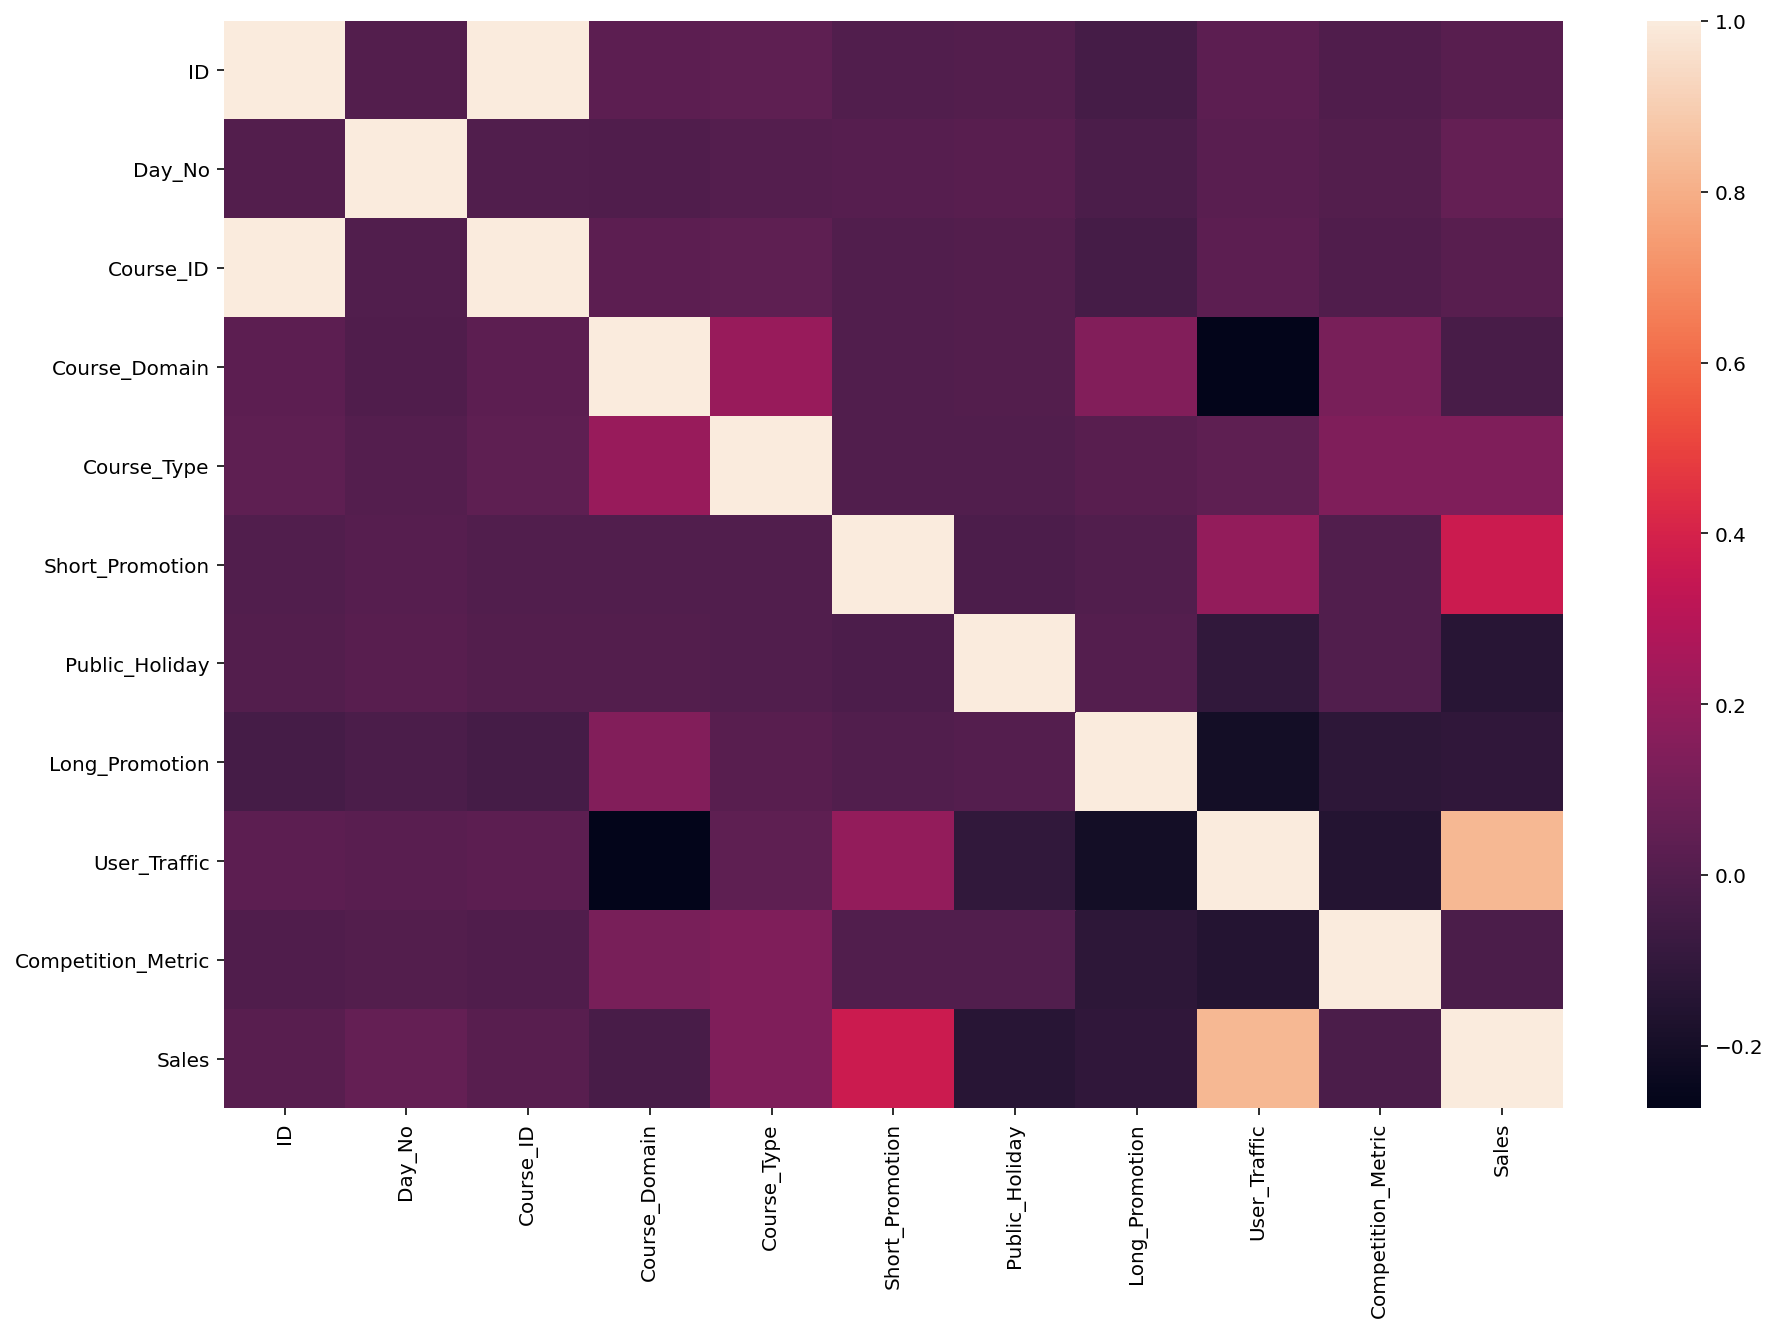

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [11]:
##### save data to csv
df.to_csv('CleanTrainingData.csv',index=False)

#### Scatter Plot

Text(0, 0.5, 'User_Traffic')

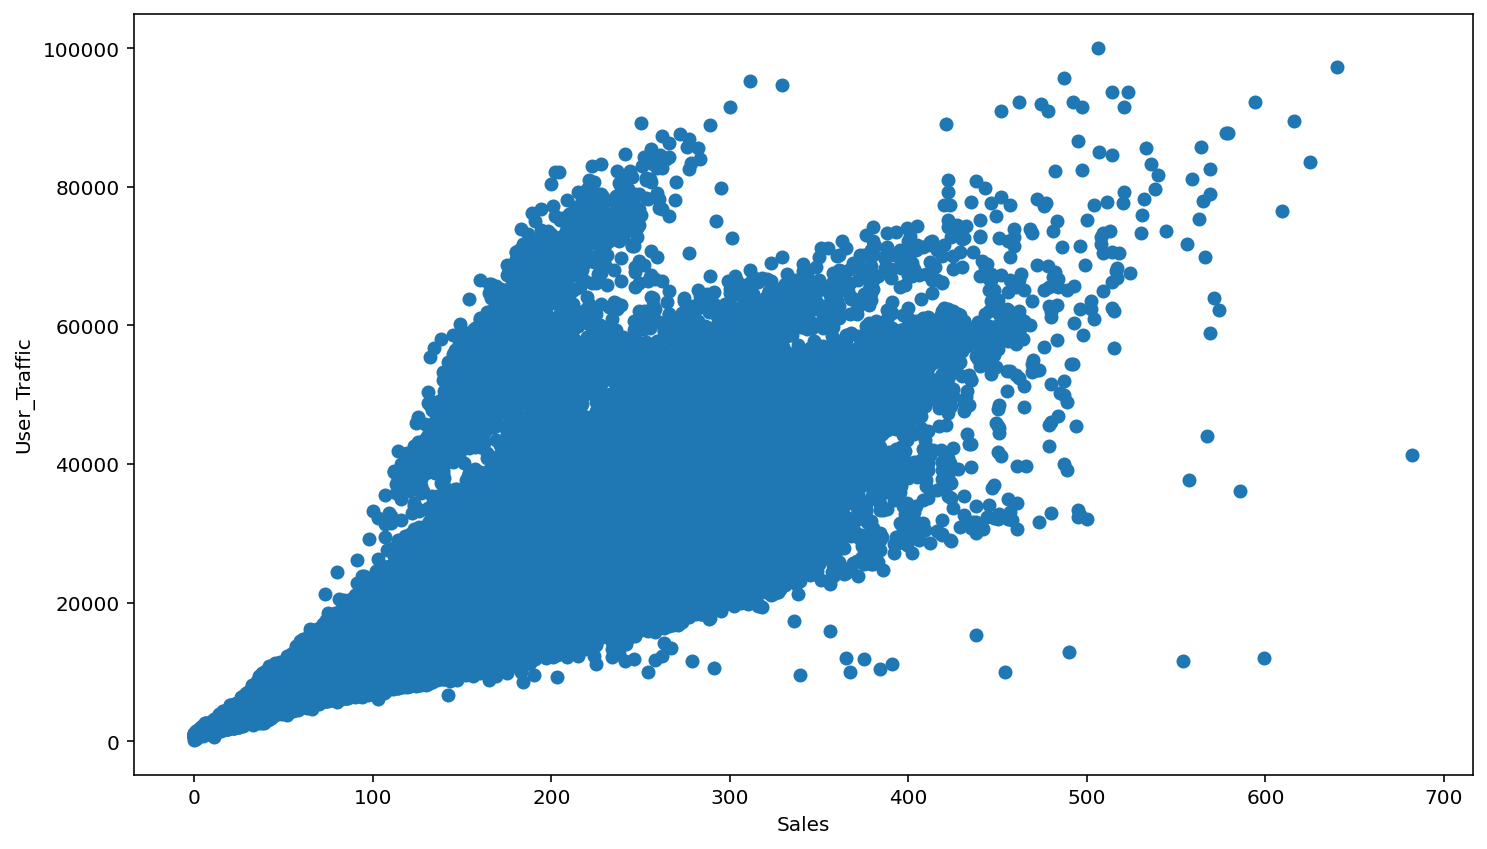

In [12]:
plt.scatter(df.Sales,df.User_Traffic)
plt.xlabel('Sales')
plt.ylabel('User_Traffic')


######  From the scatter plot we can observe that user_Traffic has postive linear relationship with sales.

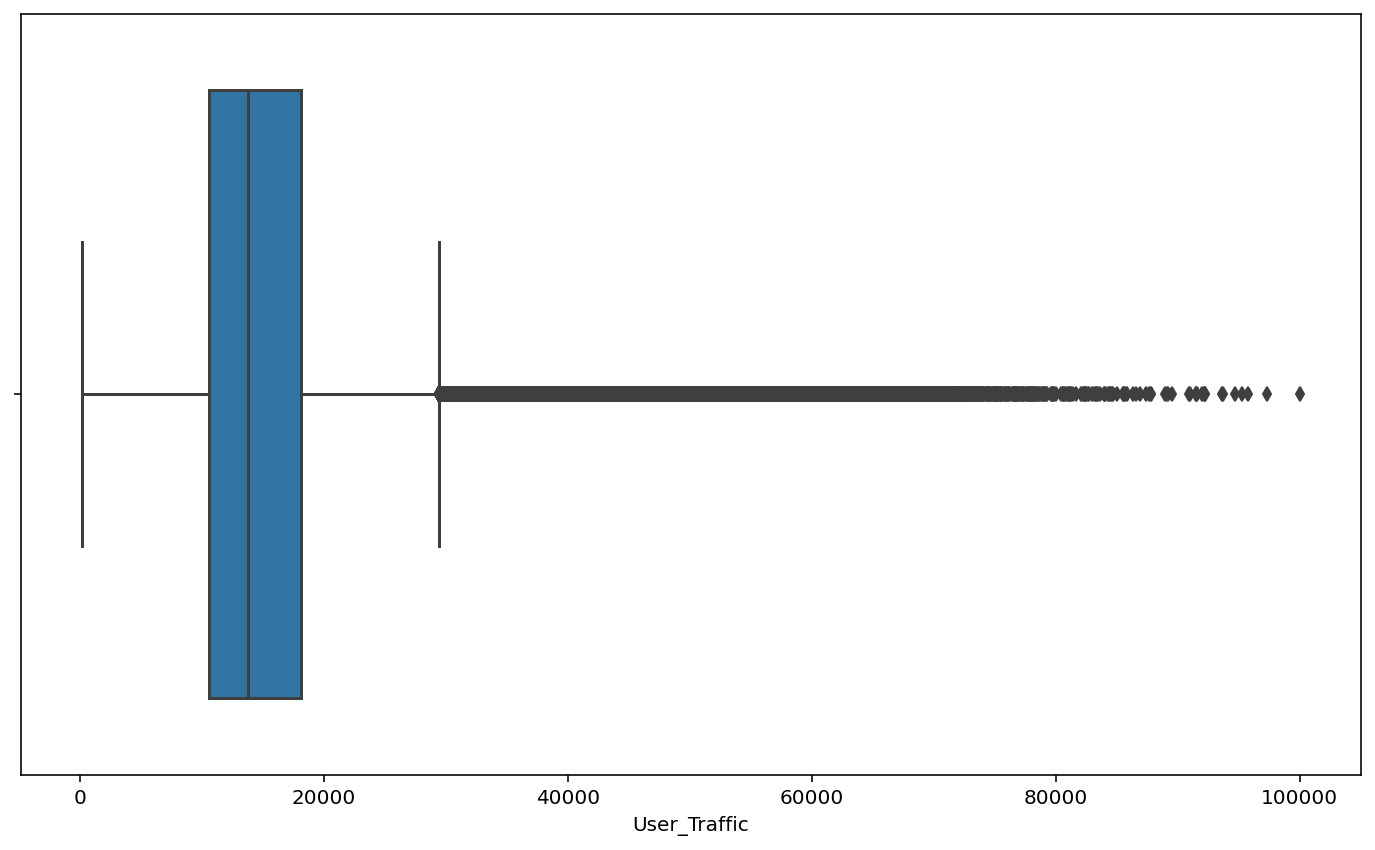

In [13]:
sns.boxplot(df['User_Traffic'])
plt.show()


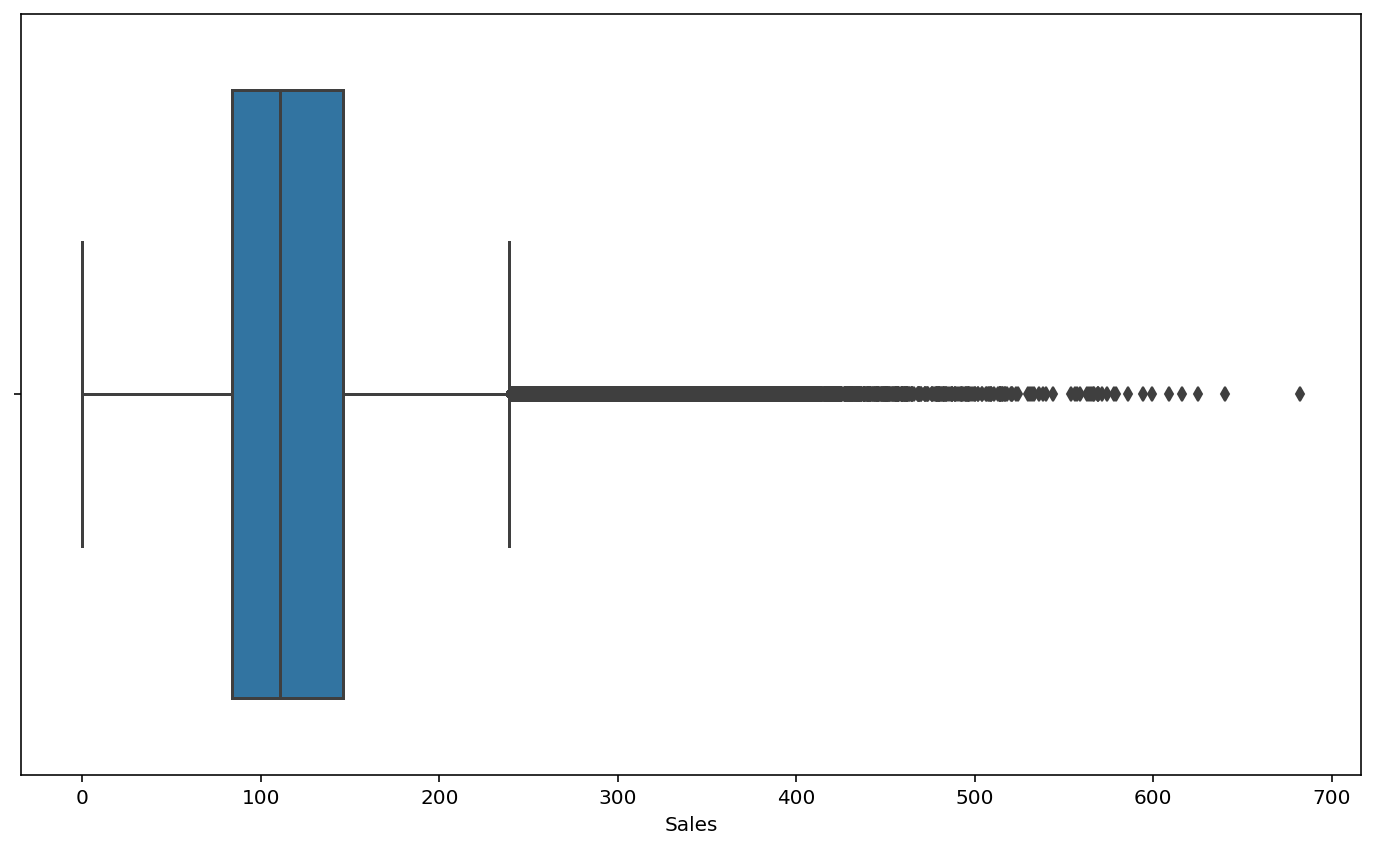

In [14]:
sns.boxplot(df['Sales'])
plt.show()


###### Outliers present in the data


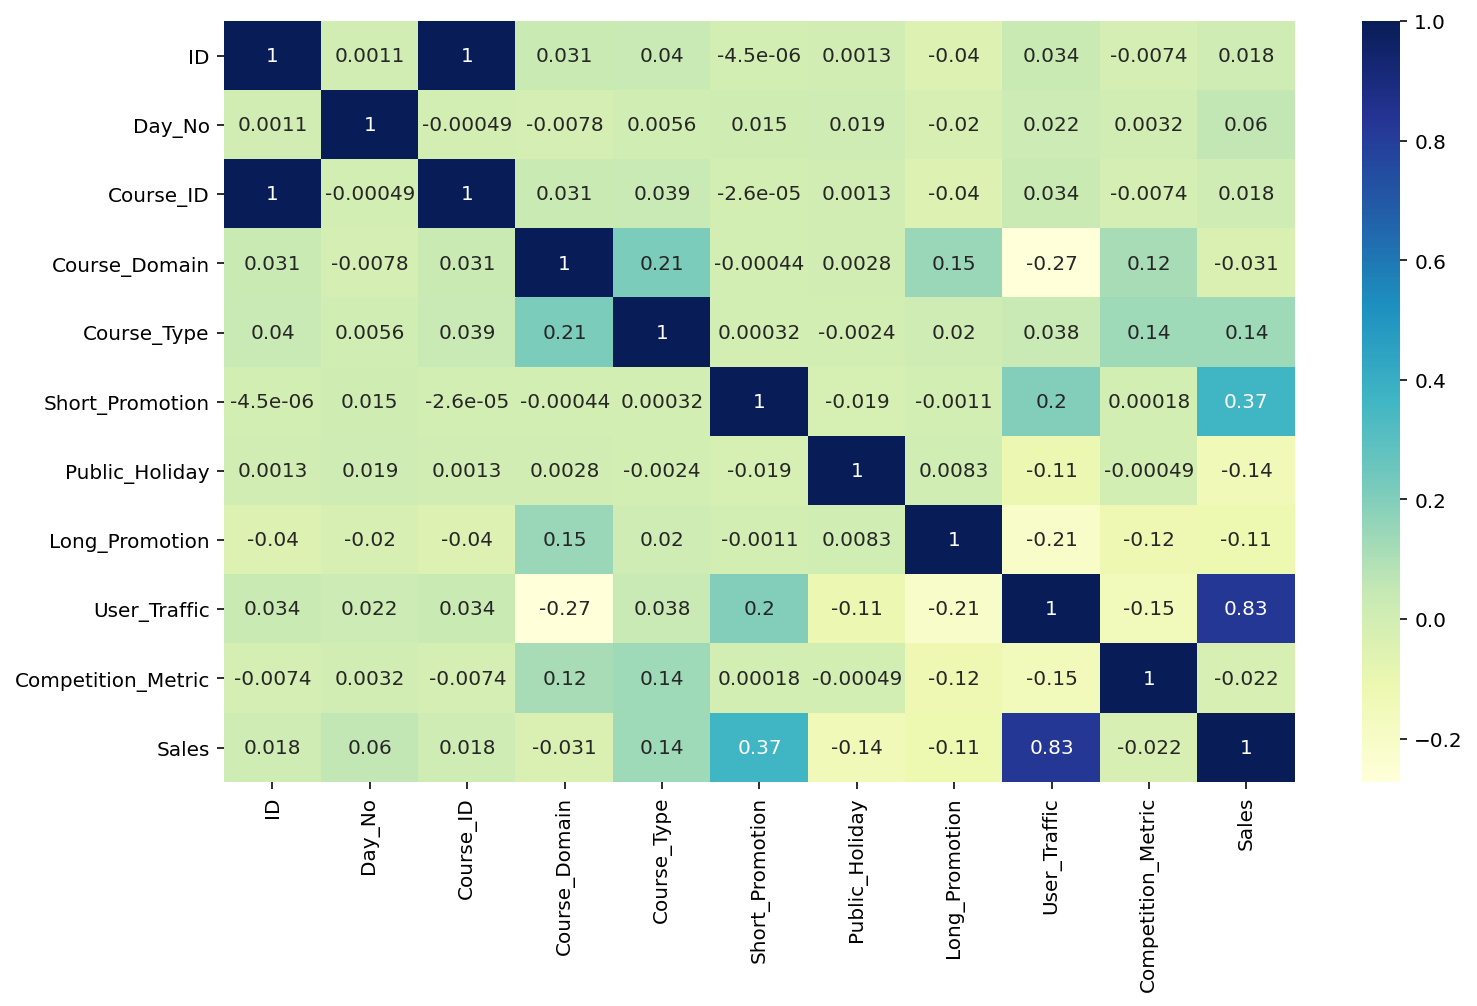

In [15]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()


###### As is visible from the pairplot and the heatmap, the variable User_Traffic seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using User_Traffic as our feature variable.


#### Model Building
<span style="color:blue">

Performing Simple Linear Regression
    
Equation of linear regression
    
y=c+m1x1+m2x2+...+mnxn 
    
y  is the response
    
c  is the intercept
    
m1  is the coefficient for the first feature
    
mn  is the coefficient for the nth feature
    
In our case:

y=c+m1×User_Traffic
    
The  m  values are called the model coefficients or model parameters.



###### Generic Steps in model building using statsmodels

###### We first assign the feature variable, User_Traffic, in this case, to the variable X and the response variable, Sales, to the variable y.



In [16]:
df = pd.read_csv("CleanTrainingData.csv")
df.head(5)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,1,0,0,1,1,11004,0.007,81
1,2,2,1,1,0,0,0,1,13650,0.007,79
2,3,3,1,1,0,0,0,1,11655,0.007,75
3,4,4,1,1,0,0,0,1,12054,0.007,80
4,5,5,1,1,0,0,0,1,6804,0.007,41


In [17]:
X = df['User_Traffic']
y = df['Sales']


##### Train-Test Split
You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset



In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [19]:
# Let's now take a look at the train dataset

X_train.head(10)


325186    23352
207353    21168
69200     10080
10957      7350
56974     10605
328846     6132
142174     1701
327656    14238
465068     7644
251810    10605
Name: User_Traffic, dtype: int64

In [20]:
y_train.head()


325186    191
207353    199
69200      81
10957      65
56974      66
Name: Sales, dtype: int64

#### Building a Linear Model
You first need to import the statsmodel.api library using which you'll perform the linear regression.



In [21]:
import statsmodels.api as sm


By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below



In [22]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()


In [23]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params


const           31.287883
User_Traffic     0.005822
dtype: float64

In [24]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                 7.858e+05
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        04:12:00   Log-Likelihood:            -1.7264e+06
No. Observations:              357226   AIC:                         3.453e+06
Df Residuals:                  357224   BIC:                         3.453e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           31.2879      0.113    276.591   

Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for User_Traffic is 0.0.0058 , with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.687
Meaning that 68.7% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.



The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales=31.2879+0.0058×TV

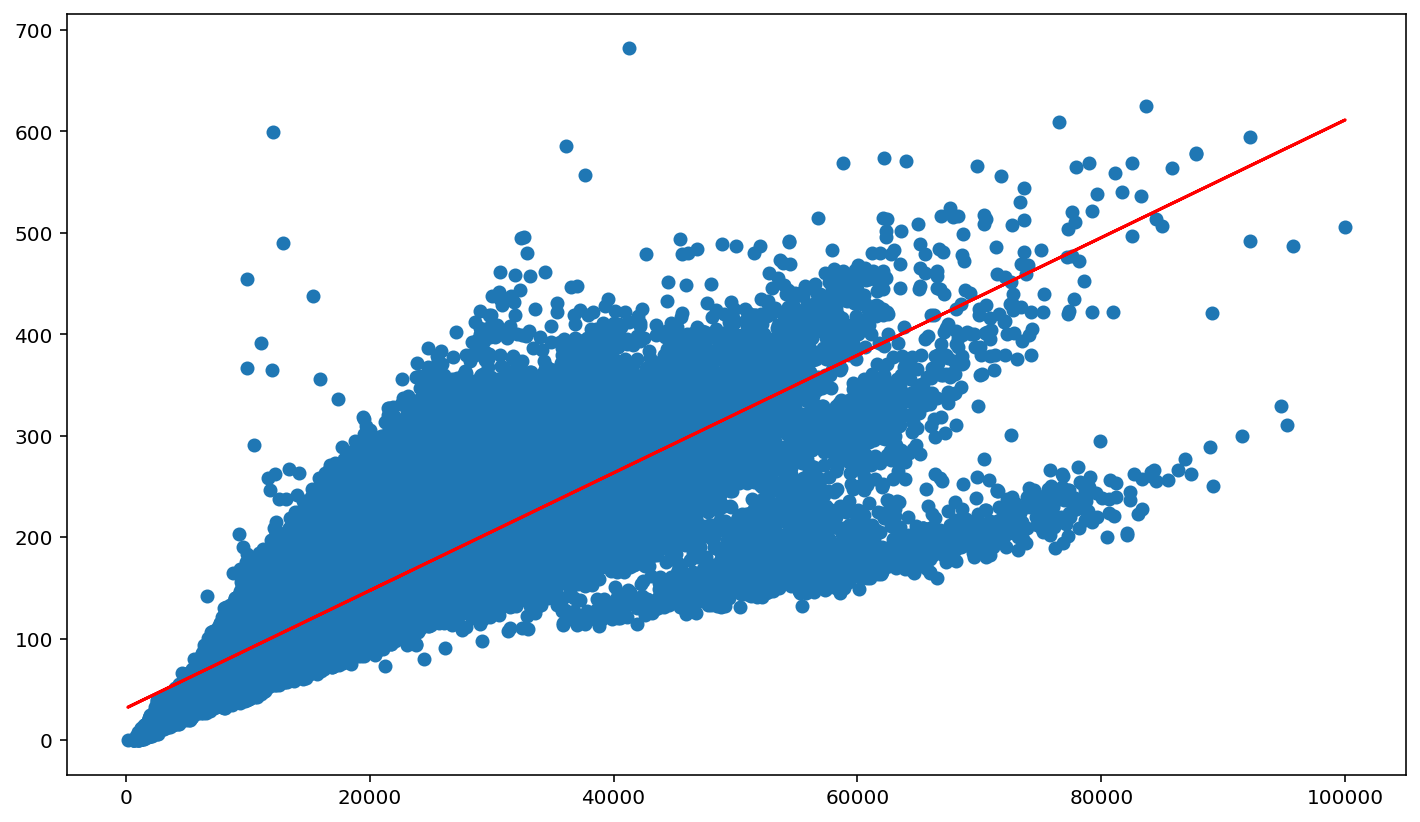

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train,31.2879 + 0.0058*X_train, 'r')
plt.show()


##### Model Evaluation

##### Residual analysis

###### To validate assumptions of the model, and hence the reliability for inference

##### Distribution of the error terms

###### We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.



In [26]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)


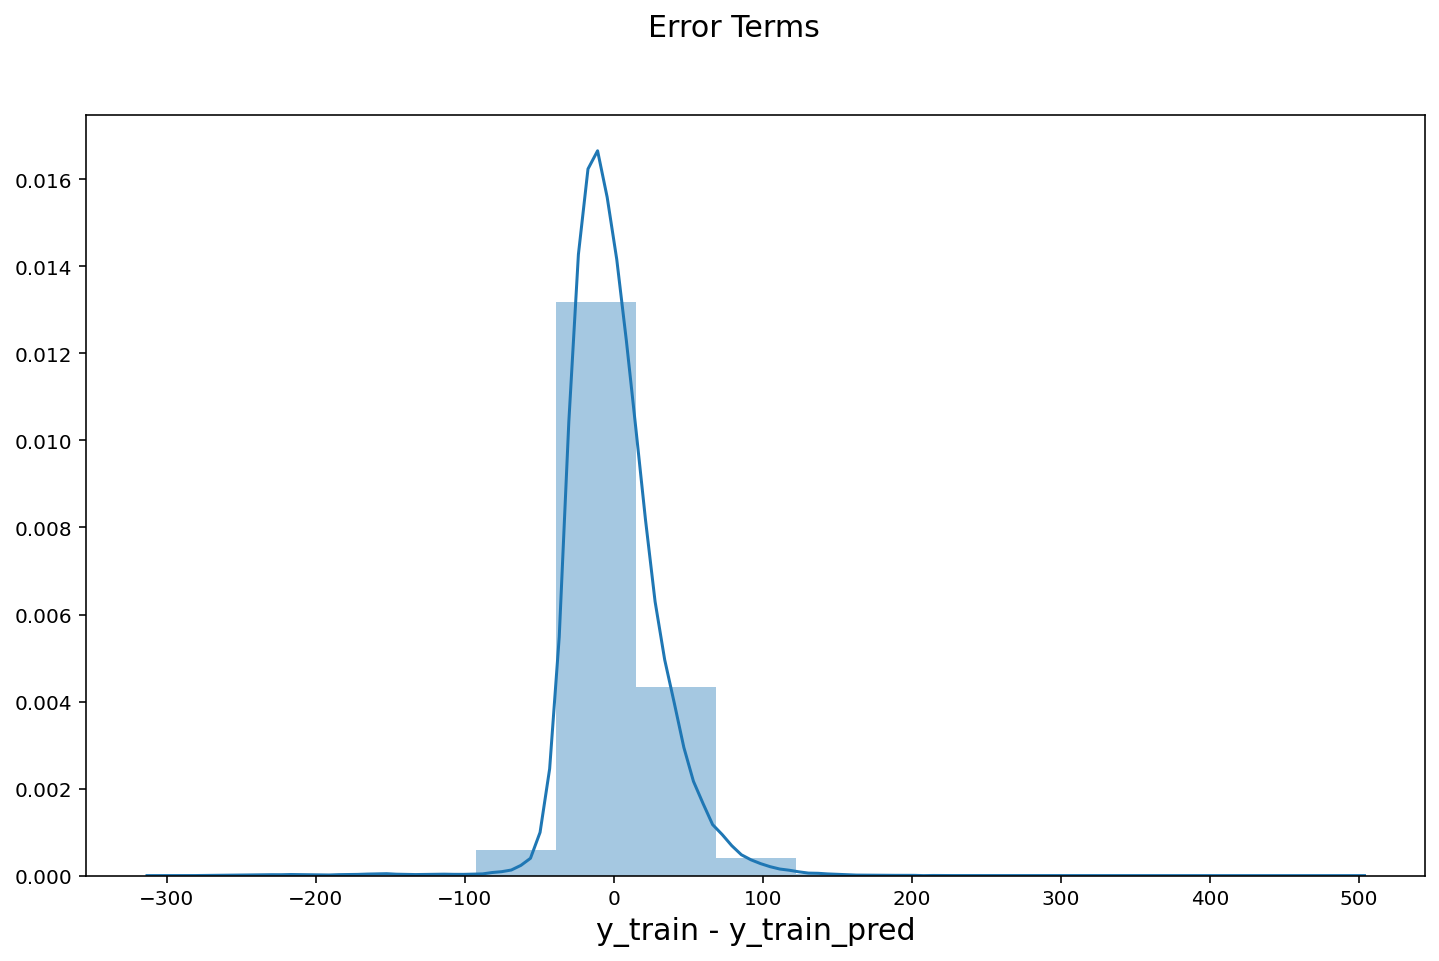

In [27]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()


######  The residuals are following the normally distributed with a mean 0. All good!



###### Predictions on the Test Set


Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.



In [28]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)


In [29]:
y_pred.head()


278891    103.173231
295499    160.143592
87951     115.887646
324798    116.254408
153847     93.026149
dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

Looking at the RMSE

In [31]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))


30.332860625419883

###### Checking the R-squared on the test set

In [32]:
r_squared = r2_score(y_test, y_pred)
r_squared


0.6890057752794786

Visualizing the fit on the test set

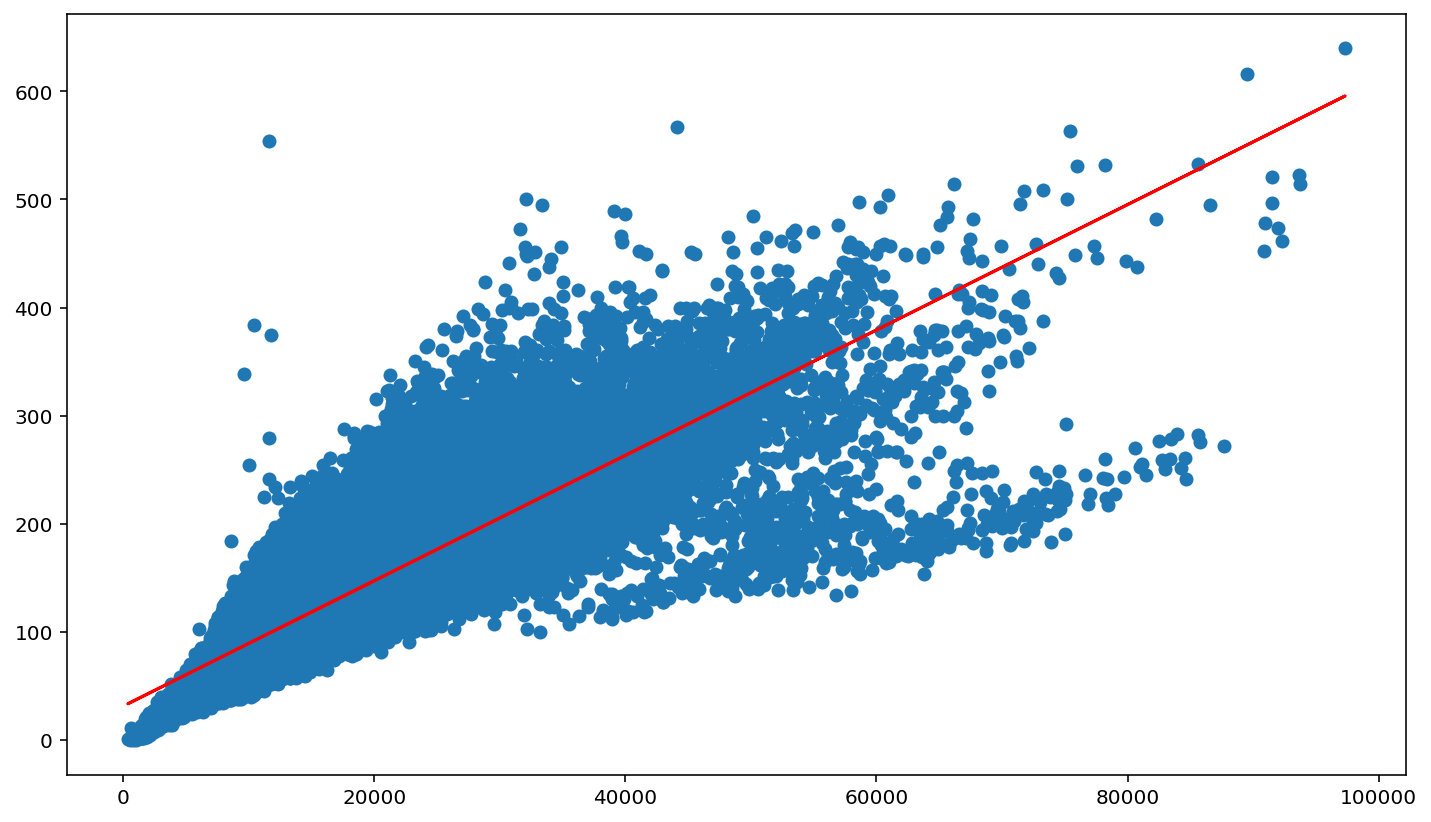

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test,31.2879 + 0.0058*X_test, 'r')
plt.show()


In [34]:
df = pd.read_csv("CleanTrainingData.csv")

#X = df.drop(['ID','Course_Domain','Public_Holiday','Long_Promotion','Competition_Metric','Sales'],axis=1)
X = df.drop(['ID','Sales'],axis=1)

y = df['Sales']


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [37]:
lr_accuarcy=round(lr.score(X_train,y_train)*100,2)
print(lr_accuarcy)

78.25


In [38]:
lr_predict=lr.predict(X_test)
print(lr_predict)
#print(accuracy_score(lr_predict,y_test))

[ 98.71592471 178.49664916 123.06724284 ... 102.38923858 175.52755466
 145.67421097]


In [39]:
df = pd.read_csv("CleanTrainingData.csv",index_col=None) 
X = df.iloc[:, 1:10].values
#df = pd.read_csv("CleanTrainingData.csv",index_col=None) 
y = df.iloc[:, 10].values

y[10]


86